# Predictive model for the Lunar albedo based on the chemical composition data from the Lunar Prospector.


Data source - https://github.com/ML4SCI/ML4SCI_GSoC/tree/main/Messenger/Moon



In [2]:
##Importing important python libraries for plotting and data preprocessing¶

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import pandas as pd
mpl.style.use('classic')
%matplotlib inline

from sklearn import metrics
sns.set()

# Part 1- Data Preprocessing and Exploratory Data Analysis



The data is stored in a CSV files with 360 rows and 720 columns.

The goal of data preprocessing is to convert the data in a format suitable for training and testing .

In [3]:
##Step 1 - > Converting all the data frames into Numpy Matrix to divide the Left Side as Training and Right as Testing


albedo = pd.read_csv('Albedo_Map.csv',header=None);
Ti =  pd.read_csv("LPTi_Map.csv",header=None);
Fe =  pd.read_csv("LPFe_Map.csv",header=None);
K  =  pd.read_csv("LPK_Map.csv",header=None);
Th =  pd.read_csv("LPK_Map.csv",header=None);


alb = albedo.to_numpy()
ti = Ti.to_numpy() 
fe = Fe.to_numpy()
k = K.to_numpy()
th = Th.to_numpy()

alb_train = alb[:,:360]
alb_test = alb[:,360:]
ti_train = ti[:,:360]
ti_test = ti[:,360:]
fe_train = fe[:,:360]
fe_test = fe[:,360:]
k_train = k[:,:360]
k_test = k[:,360:]
th_train = th[:,:360]
th_test = th[:,360:]

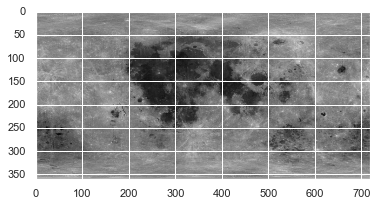

In [4]:
##Plotting to the original to check if the above conversion of successful

alb_final = np.concatenate((alb_train,alb_test), axis=1)

plt.imshow(alb_final, cmap="gray") 
plt.show()

In [5]:
##Step 2-> Flatting all the Matrices and stacking the left side and right side data to their respectively dataframes.


flat_alb_train = alb_train.flatten()
flat_alb_test = alb_test.flatten()

flat_ti_train = ti_train.flatten()
flat_ti_test = ti_test.flatten()

flat_fe_train = fe_train.flatten()
flat_fe_test= fe_test.flatten()

flat_k_train = k_train.flatten()
flat_k_test = k_test.flatten()

flat_th_train = th_train.flatten()
flat_th_test = th_test.flatten()

data_train = {'Ti':flat_ti_train, 
        'Fe':flat_fe_train, 
        'K':flat_k_train, 
        'Th':flat_th_train, 
        'Albedo':flat_alb_train} 
data_test = {'Ti':flat_ti_test, 
        'Fe':flat_fe_test, 
        'K':flat_k_test, 
        'Th':flat_th_test, 
        'Albedo':flat_alb_test} 

LEFT = pd.DataFrame(data= data_train)
RIGHT = pd.DataFrame(data= data_test)

In [6]:
##Step 3-> Lets do some EDA
##Top five rows of the Left side Dataframe

LEFT.head()

,Ti,Fe,K,Th,Albedo
0,0.190154,4.04409,788.81,788.81,0.331936
1,0.190154,4.04409,788.81,788.81,0.332611
2,0.190154,4.04409,788.81,788.81,0.332240
3,0.190154,4.04409,788.81,788.81,0.331028
4,0.190154,4.04409,788.81,788.81,0.331094


In [7]:
##some insights about the data using info() and describe() methods.

LEFT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129600 entries, 0 to 129599
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Ti      129600 non-null  float64
 1   Fe      129600 non-null  float64
 2   K       129600 non-null  float64
 3   Th      129600 non-null  float64
 4   Albedo  129600 non-null  float64
dtypes: float64(5)
memory usage: 4.9 MB


In [8]:
LEFT.describe()

,Ti,Fe,K,Th,Albedo
count,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000
mean,0.604026,5.734629,853.252498,853.252498,0.285794
std,0.904006,4.134721,824.795878,824.795878,0.057578
min,0.000000,0.271907,0.000000,0.000000,0.096897
25%,0.069470,3.306880,310.490000,310.490000,0.258126
50%,0.277718,4.019060,539.460000,539.460000,0.303909
75%,0.626194,6.295210,1116.425000,1116.425000,0.324932
max,6.135470,23.901800,4356.400000,4356.400000,0.470428


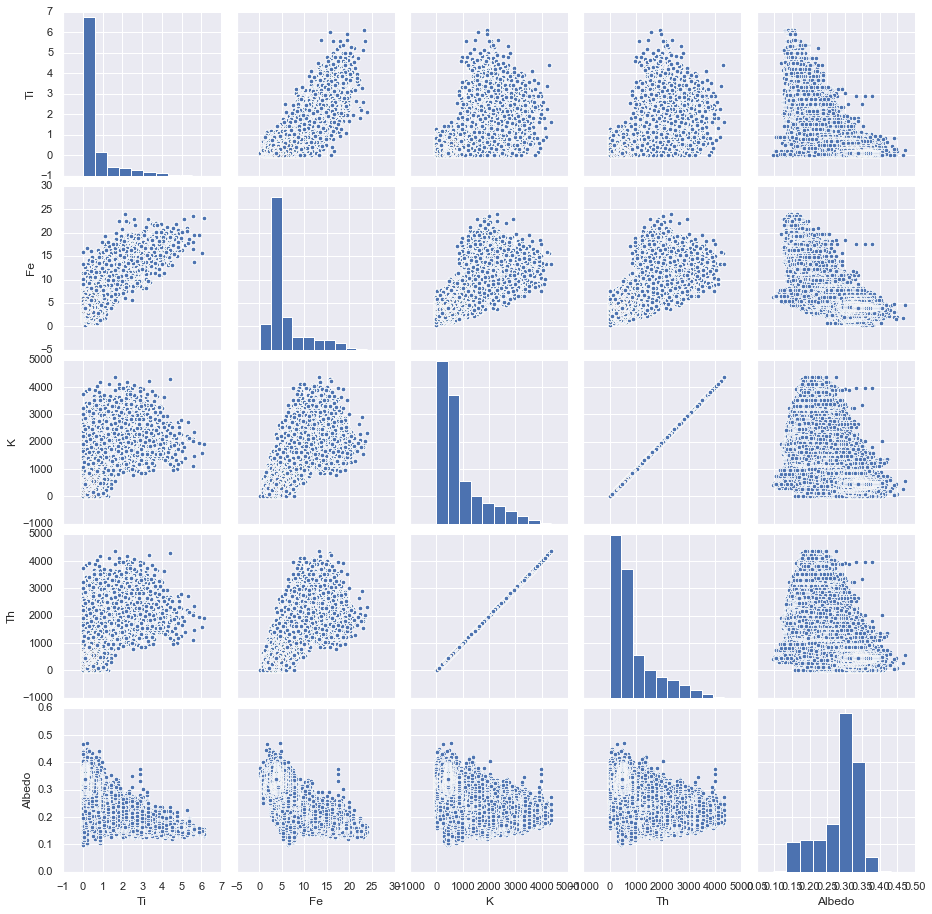

In [9]:
##Let's explore some relationships among the variables if any across the entire data set

sns.pairplot(LEFT)

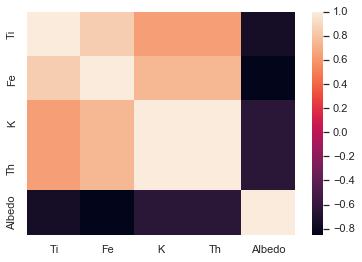

In [10]:
##Ingsights from the plots above
#1) Almost all of the variables are heavly skewed.
2#) Some correlation can also be obeserved , so lets plot the correlation matrix to understand it better

sns.heatmap(LEFT.corr())

# Part 2- Machine Learning
The goal is to build a regression model using different machine learning algorithms to predict the brightness of each pixel using the left side of the albedo as training data and right side as the test data.

For all the models these steps will be followed :-

1) Fitting the regressor object on the hyperparameters obtained using GridSearch

2) Print the details about the model (Correlation(R) bewtween actual and predicted values, evaluation metrics etc.

3) Plotting the predictions and 2-D image and residuals as 1-D histogram

Note the final peformace would be compared using Mean Square Error(MSE) as its a good evaluation metric for regression models

In [11]:
##First and foremost lets divide the data in train and test and do feature scaling


X_train = LEFT.iloc[:, :-1].values
y_train = LEFT.iloc[:, 4].values
X_test = RIGHT.iloc[:, :-1].values
y_test = RIGHT.iloc[:, 4].values

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# 1)Linear Regression¶

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)
residuals  = y_test-y_pred_test

print("About Model")
print("R:",regressor.score(X_train, y_train))
print("Adj R^2:",(1 - (1-regressor.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)),"\n")

print("Model Evaluation")

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

About Model
R: 0.7269141920289073
Adj R^2: 0.7269057631293983 

Model Evaluation
MAE: 0.024634054761986983
MSE: 0.001025152221398642
RMSE: 0.032017998397755


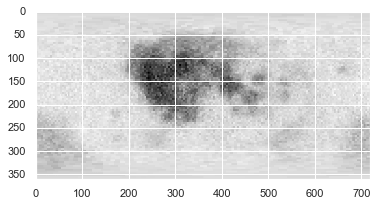

In [14]:
y_pred_train= y_pred_train.reshape(360,360)
y_pred_test= y_pred_test.reshape(360,360)
y_img = np.concatenate([y_pred_train,y_pred_test],axis=1)
plt.imshow(y_img, cmap="gray") 
plt.show()

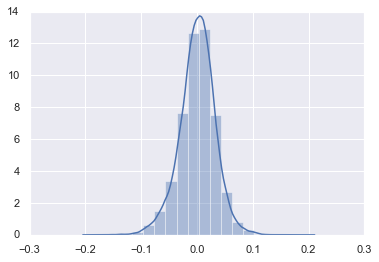

In [15]:
sns.distplot(residuals,bins=20)

# The MSE is 0.001025152221398643
Insights
As expected the Linear Regression doesnt perform well as the data doesnt seem to be linearly seperable and there is correlation among the features .


## 2)Support Vector Machine Regressor

In [16]:
from sklearn.svm import SVR

In [17]:
##Note - Many instances of Grid Seach using different values of hyperparameter have been done but all have not been shown


from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,10,500],  
              'gamma': [ 0.003, 0.03,0.3,1],
              'kernel': ['linear']}  

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 4,cv=3,scoring='neg_mean_squared_error') 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=0.003, kernel=linear ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=0.1, gamma=0.003, kernel=linear, score=-0.001, total=   1.6s
[CV] C=0.1, gamma=0.003, kernel=linear ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] .. C=0.1, gamma=0.003, kernel=linear, score=-0.001, total=   1.3s
[CV] C=0.1, gamma=0.003, kernel=linear ...............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV] .. C=0.1, gamma=0.003, kernel=linear, score=-0.001, total=   1.3s
[CV] C=0.1, gamma=0.03, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.1s remaining:    0.0s


[CV] ... C=0.1, gamma=0.03, kernel=linear, score=-0.001, total=   1.7s
[CV] C=0.1, gamma=0.03, kernel=linear ................................
[CV] ... C=0.1, gamma=0.03, kernel=linear, score=-0.001, total=   1.4s
[CV] C=0.1, gamma=0.03, kernel=linear ................................
[CV] ... C=0.1, gamma=0.03, kernel=linear, score=-0.001, total=   1.3s
[CV] C=0.1, gamma=0.3, kernel=linear .................................
[CV] .... C=0.1, gamma=0.3, kernel=linear, score=-0.001, total=   1.6s
[CV] C=0.1, gamma=0.3, kernel=linear .................................
[CV] .... C=0.1, gamma=0.3, kernel=linear, score=-0.001, total=   1.5s
[CV] C=0.1, gamma=0.3, kernel=linear .................................
[CV] .... C=0.1, gamma=0.3, kernel=linear, score=-0.001, total=   1.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ...... C=0.1, gamma=1, kernel=linear, score=-0.001, total=   1.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  9.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 500], 'gamma': [0.003, 0.03, 0.3, 1],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=4)

In [18]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 0.003, 'kernel': 'linear'}
SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.003,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [19]:
#The linear model was performing poorly and using gussian kernel gave better results

print(grid.best_params_)
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 0.003, 'kernel': 'linear'}
SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.003,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [20]:
##After doing grid search and experimenting with the hyperparameters C=2700 and gamma = 0.00008 gave the best results


regressor =SVR(C=2700, gamma=0.00008)
regressor.fit(X_train,y_train)

# Predicting the Test set results

y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)
residuals  = y_test-y_pred_test


print("About Model")
print("R:",regressor.score(X_train, y_train))
print("Adj R^2:",(1 - (1-regressor.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)),"\n")

print("Model Evaluation")

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))


About Model
R: 0.7313521137574608
Adj R^2: 0.7313438218361292 

Model Evaluation
MAE: 0.02549109407986941
MSE: 0.0010568361978324054
RMSE: 0.03250901717727568


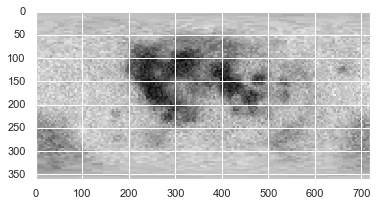

In [21]:
y_pred_train= y_pred_train.reshape(360,360)
y_pred_test= y_pred_test.reshape(360,360)
y_img = np.concatenate([y_pred_train,y_pred_test],axis=1)
plt.imshow(y_img, cmap="gray") 
plt.show()


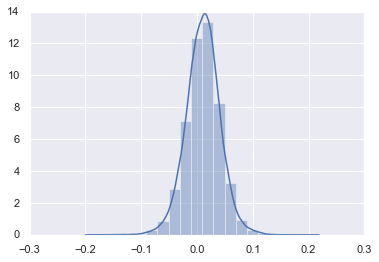

In [22]:
sns.distplot(residuals,bins=20)

# The MSE is 0.0010564847231500207

## Insights

The image looks better than the one obtained through Linear Regression even though the MSE is slightly higher , their is scope for improvement


## 3)Random Forest 

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
##Tuning the hyperparameter n_estimators and plotting the results

rf = RandomForestRegressor(n_estimators=100)
error_rate_test = []
error_rate_train=[]

for iter in range(10):
    rf.fit(X_train, y_train)
    y_train_predicted = rf.predict(X_train)
    y_test_predicted = rf.predict(X_test)
    mse_train = metrics.mean_squared_error(y_train, y_train_predicted)
    mse_test = metrics.mean_squared_error(y_test, y_test_predicted)
    error_rate_train.append( metrics.mean_squared_error(y_train, y_train_predicted))
    error_rate_test.append(metrics.mean_squared_error(y_test, y_test_predicted))
    print("Iteration: {} Train mse: {} Test mse: {}".format(iter, mse_train, mse_test))
    rf.n_estimators += 100

Iteration: 0 Train mse: 0.00018334486383259147 Test mse: 0.0011975184188270896
Iteration: 1 Train mse: 0.0001833031719271683 Test mse: 0.0011923379483477874
Iteration: 2 Train mse: 0.00018328752340904304 Test mse: 0.0011846175503313638
Iteration: 3 Train mse: 0.00018327951977664867 Test mse: 0.0011870919312183222
Iteration: 4 Train mse: 0.00018327594746763196 Test mse: 0.0011879855136922007
Iteration: 5 Train mse: 0.0001832733552385428 Test mse: 0.0011852996359835999
Iteration: 6 Train mse: 0.000183271698649122 Test mse: 0.0011843275287877122
Iteration: 7 Train mse: 0.00018327011085902587 Test mse: 0.001189173571315996
Iteration: 8 Train mse: 0.0001832687456017879 Test mse: 0.001187182645696979
Iteration: 9 Train mse: 0.00018326808630423228 Test mse: 0.0011869175646073624


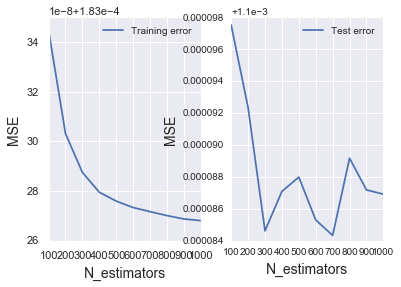

In [25]:

plt.subplot(1, 2, 1)

plt.style.use('seaborn')
plt.plot(range(100,1100,100),error_rate_train, label = 'Training error')
#plt.plot(range(100,1200,100),error_rate_test, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('N_estimators', fontsize = 14)
plt.legend()
plt.subplot(1, 2, 2)

plt.style.use('seaborn')
plt.plot(range(100,1100,100),error_rate_test, label = 'Test error')
#plt.plot(range(100,1200,100),error_rate_test, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('N_estimators', fontsize = 14)
plt.legend()

In [26]:
##Note - Many instances of Grid Seach using different values of hyperparameter have been done but all have not been shown

from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [50,250,500,1000],
 'max_depth': [5,10], 
 'max_features' :["sqrt"],
'min_samples_leaf':[5,10]}
]

grid_search_forest = GridSearchCV(regressor, param_grid, cv=10, scoring='neg_mean_squared_error',verbose=5)
grid_search_forest.fit(X_train, y_train)

grid_search_forest.best_params_

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=5, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter max_depth for estimator SVR(C=2700, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=8e-05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [27]:
# create regressor object 
regressor = RandomForestRegressor(max_features='sqrt',max_depth=10,min_samples_leaf=5,n_estimators=600) 
 
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

In [28]:
print("About Model")
print("R:",regressor.score(X_train, y_train))
print("Adj R^2:",(1 - (1-regressor.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)),"\n")

print("Model Evaluation")

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))


About Model
R: 0.8648975622181015
Adj R^2: 0.8648933922288957 

Model Evaluation
MAE: 0.023970223129863494
MSE: 0.000986058268347703
RMSE: 0.03140156474361911


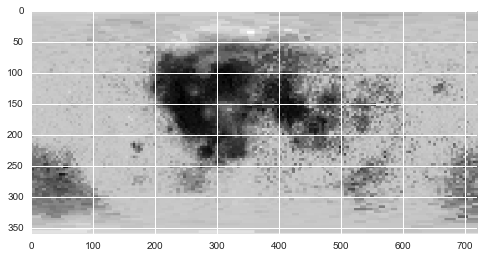

In [29]:
y_pred_train= y_pred_train.reshape(360,360)
y_pred_test= y_pred_test.reshape(360,360)
y_img = np.concatenate([y_pred_train,y_pred_test],axis=1)
plt.imshow(y_img, cmap="gray") 
plt.show()

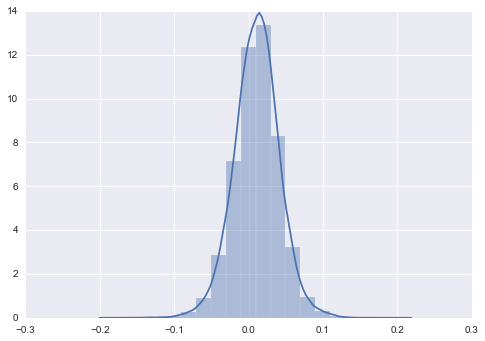

In [30]:
sns.distplot(residuals,bins=20)

# The MSE is 0.000986584356014296

## Insights
The Model perform better than all the above ones wrt MSE but even after doing hours of grid search and hyperparameter tuning it has overfitted to the left portion as its clearly visible from the image .

# 4)XGBOOST

In [31]:
conda install -c conda-forge xgboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [32]:
import pickle
import xgboost
regressor=xgboost.XGBRegressor()

In [33]:
##Hyperparameter tuning using RandomizedSearchCV

# Hyper Parameter Optimization

booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Defineing the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

# Using RandomizedSearchCV for creating model

from sklearn.model_selection import RandomizedSearchCV

# Set up the random search with 5-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(X_train,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   53.6s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  7.4min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 12.1min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 17.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbt

In [34]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [35]:
##The hyperparameters obtained using the above method gave the best results

regressor=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

regressor.fit(X_train,y_train)
# Predicting the Test set results
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)
residuals  = y_test-y_pred_test

In [36]:
print("R:",regressor.score(X_train, y_train))
print("Adj R^2:",(1 - (1-regressor.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)),"\n")

print("Model Evaluation")

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))


R: 0.7903649932835797
Adj R^2: 0.7903585228176908 

Model Evaluation
MAE: 0.02334789735875415
MSE: 0.0009304179266331601
RMSE: 0.03050275277140016


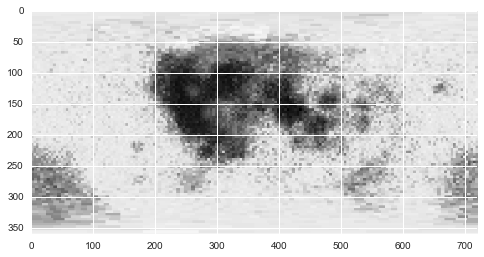

In [37]:
y_pred_train= y_pred_train.reshape(360,360)
y_pred_test= y_pred_test.reshape(360,360)
y_img = np.concatenate([y_pred_train,y_pred_test],axis=1)
plt.imshow(y_img, cmap="gray") 
plt.show()

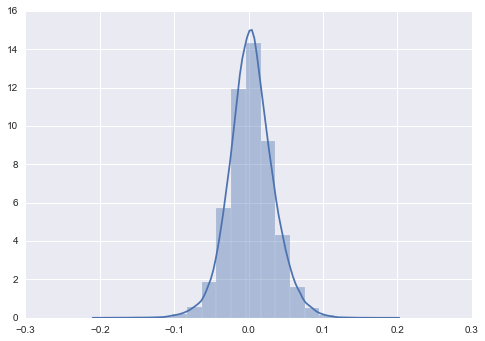

In [38]:
sns.distplot(residuals,bins=20)


## Insights
Looks like we have a winner here, as the MSE is the lowest obtained will now and Image also looks good on both the sides
XGBoost is one of the most powerful ML algorithm

# The MSE is 0.0009304179266331601# 

In [39]:
filename = 'Best_Model_XG_boost.sav'
pickle.dump(regressor, open(filename, 'wb'))

# 5) Neural Network

Lets wrap things up by trying a Neural Network

In [54]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
from tensorflow import keras

  Using cached tensorflow-2.4.1-cp37-cp37m-win_amd64.whl (370.7 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
Processing c:\users\ritika saxena\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2\termcolor-1.1.0-py3-none-any.whl
  Using cached grpcio-1.32.0-cp37-cp37m-win_amd64.whl (2.5 MB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached protobuf-3.15.8-cp37-cp37m-win_amd64.whl (904 kB)
  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
Processing c:\users\ritika saxena\appdata\local\pip\cache\wheels\62\76\4c\aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6\wrapt-1.12.1-cp37-cp37m-win_amd64.whl
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorboard_plugin_wit-

ERROR: astroid 2.3.3 requires typed-ast<1.5,>=1.4.0; implementation_name == "cpython" and python_version < "3.8", which is not installed.
ERROR: astroid 2.3.3 has requirement wrapt==1.11.*, but you'll have wrapt 1.12.1 which is incompatible.


In [55]:
def create_model(learn_rate=0.01):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(4))
    # model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(4))
    model.add(tf.keras.layers.Dense(4))
    model.add(tf.keras.layers.Dense(1))

    opt = keras.optimizers.Adam(learning_rate=learn_rate)
    model.compile(loss='mse', optimizer=opt)
    return model

In [63]:
from keras.wrappers.scikit_learn import KerasRegressor
model = KerasRegressor(build_fn=create_model)
learn_rate = [0.001]
batch_size = [10,32]
epochs = [10, 50]
param_grid = dict(learn_rate=learn_rate,batch_size=batch_size,epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=4, cv=5,verbose=10)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  6.4min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 19.9min
[Parallel(n_jobs=4)]: Done  16 out of  20 | elapsed: 26.2min remaining:  6.5min
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed: 33.1min finished


Epoch 1/10
4050/4050 [==============================] - 8s 2ms/step - loss: 0.1141
Epoch 2/10
4050/4050 [==============================] - 7s 2ms/step - loss: 9.3862e-04
Epoch 3/10
4050/4050 [==============================] - 8s 2ms/step - loss: 9.6394e-04
Epoch 4/10
4050/4050 [==============================] - 8s 2ms/step - loss: 9.5172e-04
Epoch 5/10
4050/4050 [==============================] - 7s 2ms/step - loss: 9.4647e-04
Epoch 6/10
4050/4050 [==============================] - 8s 2ms/step - loss: 9.3301e-04
Epoch 7/10
4050/4050 [==============================] - 7s 2ms/step - loss: 9.3517e-04
Epoch 8/10
4050/4050 [==============================] - 7s 2ms/step - loss: 9.3295e-04
Epoch 9/10
4050/4050 [==============================] - 7s 2ms/step - loss: 9.2471e-04
Epoch 10/10
4050/4050 [==============================] - 7s 2ms/step - loss: 9.2251e-04


In [64]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.000989 using {'batch_size': 32, 'epochs': 10, 'learn_rate': 0.001}


#### After doing grid search and experimenting with the hyperparameters 'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001 gave the best MSE



In [65]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4))
# model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(4))
model.add(tf.keras.layers.Dense(4))

model.add(tf.keras.layers.Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='mse')
# This builds the model for the first time:
history  = model.fit(X_train, y_train, batch_size=10, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
12960/12960 [==============================] - 39s 3ms/step - loss: 0.0066 - val_loss: 9.7876e-04
Epoch 2/10
12960/12960 [==============================] - 37s 3ms/step - loss: 9.6283e-04 - val_loss: 9.9579e-04
Epoch 3/10
12960/12960 [==============================] - 38s 3ms/step - loss: 9.3112e-04 - val_loss: 0.0010
Epoch 4/10
12960/12960 [==============================] - 38s 3ms/step - loss: 9.2420e-04 - val_loss: 0.0010
Epoch 5/10
12960/12960 [==============================] - 38s 3ms/step - loss: 9.2267e-04 - val_loss: 0.0010
Epoch 6/10
12960/12960 [==============================] - 38s 3ms/step - loss: 9.1565e-04 - val_loss: 0.0010
Epoch 7/10
12960/12960 [==============================] - 38s 3ms/step - loss: 9.1141e-04 - val_loss: 0.0010
Epoch 8/10
12960/12960 [==============================] - 38s 3ms/step - loss: 9.1227e-04 - val_loss: 0.0010
Epoch 9/10
12960/12960 [==============================] - 36s 3ms/step - loss: 9.1555e-04 - val_loss: 0.0010
Epoch 10/10
129

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (10, 4)                   20        
_________________________________________________________________
dense_5 (Dense)              (10, 4)                   20        
_________________________________________________________________
dense_6 (Dense)              (10, 4)                   20        
_________________________________________________________________
dense_7 (Dense)              (10, 1)                   5         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


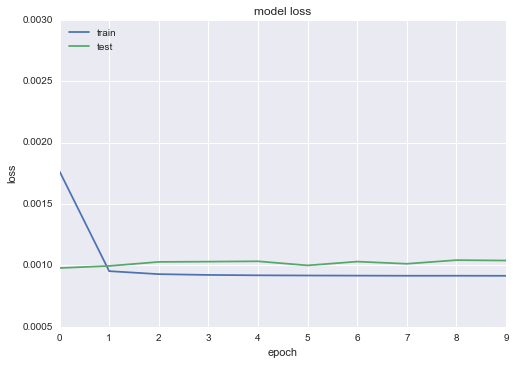

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylim(0.0005,0.003)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [68]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
y_pred_train = y_pred_train.flatten()
y_pred_test = model.predict(X_test)
y_pred_test = y_pred_test.flatten()
residuals  = y_test-y_pred_test

In [69]:
print("Model Evaluation")

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Model Evaluation
MAE: 0.02467982976373349
MSE: 0.0010398941698222788
RMSE: 0.03224739012419887


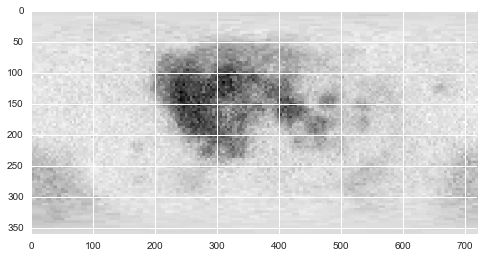

In [70]:
y_pred_train= y_pred_train.reshape(360,360)
y_pred_test= y_pred_test.reshape(360,360)
y_img = np.concatenate([y_pred_train,y_pred_test],axis=1)
plt.imshow(y_img, cmap="gray") 
plt.show()

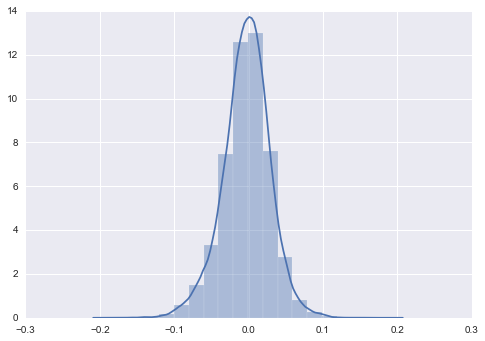

In [71]:
sns.distplot(residuals,bins=20)

## Insights
Surprisingly even after tuning and experting with a bigger and deeper nn ,the results were still poor.
This may have to do with the less no. of input features and also lack of computional resourecs for doing a extensive grid with more hyperparameter tuning
## The MSE is 0.0010610954305026602






# Final Results and Insights

#### The best image and lowest MSE obtained was with the tuned XGBOOST model

MSE: 0.0009304179266331601


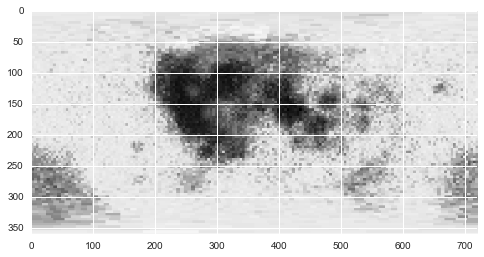

In [72]:
filename = 'Best_Model_XG_boost.sav'
loaded_model = pickle.load(open(filename, 'rb'))
y_pred_train = loaded_model.predict(X_train)
y_pred_test = loaded_model.predict(X_test)
residuals  = y_test-y_pred_test
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))

y_pred_train= y_pred_train.reshape(360,360)
y_pred_test= y_pred_test.reshape(360,360)
y_img = np.concatenate([y_pred_train,y_pred_test],axis=1)

plt.imshow(y_img, cmap="gray") 

plt.show()

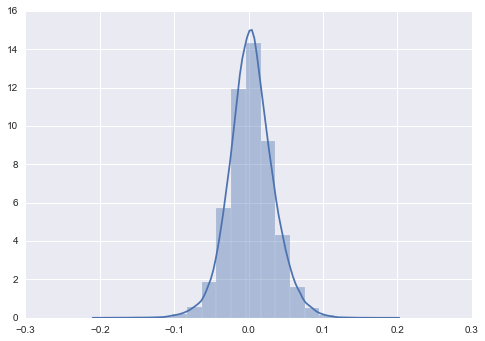

In [73]:
sns.distplot(residuals,bins=20)

## Insights
##### Best results were obtained using XGBOOST, a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.
##### Neural Networks surprisingly didnt perform as well as expected even after basic hyper parameter tuning , but their maybe a scope of improvement.
##### Only having 4 features for prediction may also be a reason that most models fail to perform well.
